# Revenue by Genre

In [279]:
import pandas as pd
import get_imdb as gi
import clean_data as imd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np
%matplotlib inline
sns.set()

In [280]:
combined = imd.movies_combined()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Volumes/GoogleDrive/My Drive/Personal/Flatiron Data Science Bootcamp/Repostories/mod_1_project/clean_data.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_cutoff['start_year'] = df_cutoff.release_date.dt.year


# Temp delete

In [317]:
ppt_list = ['action',
 'drama',
 'comedy',
 'adventure',
 'animation',
 'music',
 'musical']
genre_df.set_index('genre').loc[ppt_list,:].sort_values(by='domestic_gross_dltd',ascending = False)


,count_movies,domestic_gross,domestic_gross_dltd,worldwide_gross,production_budget,profit,median_profit_per_movie,ROI,mean_profit_per_movie,genre_capitalized
genre,,,,,,,,,,
adventure,325,4.085681e+10,1.377578e+10,1.162056e+11,3.468275e+10,8.152282e+10,135930148.0,2.350529,2.508395e+08,Adventure
action,401,3.621493e+10,1.232329e+10,9.981098e+10,3.285460e+10,6.695638e+10,65422946.0,2.037961,1.669735e+08,Action
comedy,473,2.921922e+10,1.214434e+10,6.667695e+10,1.967533e+10,4.700162e+10,35759911.0,2.388860,9.936917e+07,Comedy
drama,655,2.335273e+10,9.043869e+09,5.164734e+10,1.861261e+10,3.303473e+10,15138912.0,1.774858,5.043471e+07,Drama
animation,96,1.337075e+10,4.457289e+09,3.704553e+10,9.441500e+09,2.760403e+10,202467009.0,2.923691,2.875420e+08,Animation
music,47,1.617894e+09,6.236245e+08,3.559761e+09,8.371000e+08,2.722661e+09,11001573.0,3.252492,5.792896e+07,Music
musical,7,7.606753e+08,2.539130e+08,1.848812e+09,3.849000e+08,1.463912e+09,35552675.0,3.803356,2.091302e+08,Musical


## Analysis

### Various profitability metrics by Genre

In [281]:
# add global profit
combined['profit'] = combined.worldwide_gross - combined.production_budget
# add the genre_count variable to combined
combined['genre_count'] = combined.genres.map(lambda x: int(len(x)))
#create list of genres
genre_list = list(combined.loc[:,'action':'musical'].keys())
#create dict of genres with value = 0
genre_dict = {}

# aggregate various revenue and profitability metrics by genre
for genre in genre_list:
    genre_dict[genre] = []
    genre_dict[genre].append (int(combined[genre].sum()))
    genre_dict[genre].append (combined[combined[genre]==1]['domestic_gross'].sum())
    genre_dict[genre].append ((combined[combined[genre]==1]['domestic_gross'] / combined[combined[genre]==1]['genre_count']).sum())
    genre_dict[genre].append (combined[combined[genre]==1]['worldwide_gross'].sum())
    genre_dict[genre].append (combined[combined[genre]==1]['production_budget'].sum())
    genre_dict[genre].append (combined[combined[genre]==1]['profit'].sum())
    genre_dict[genre].append (combined[combined[genre]==1]['profit'].median())


#convert to df
genre_df = pd.DataFrame.from_dict(genre_dict, orient= 'index', columns = ['count_movies', 'domestic_gross', 'domestic_gross_dltd','worldwide_gross','production_budget','profit','median_profit_per_movie'])
genre_df.reset_index(inplace = True)
genre_df.rename(columns = {'index': 'genre'},inplace = True)

#calculate various other metrics
genre_df['ROI'] = genre_df.profit / genre_df.production_budget
genre_df['mean_profit_per_movie'] = genre_df.profit / genre_df.count_movies

#capitalize genre for charting
genre_df['genre_capitalized'] = genre_df.genre.map(lambda x: str(x).title())
# genre_df

In [307]:
genre_df.sort_values(by='domestic_gross_dltd', ascending=False).head()

,genre,count_movies,domestic_gross,domestic_gross_dltd,worldwide_gross,production_budget,profit,median_profit_per_movie,ROI,mean_profit_per_movie,genre_capitalized
8,adventure,325,4.085681e+10,1.377578e+10,1.162056e+11,3.468275e+10,8.152282e+10,135930148.0,2.350529,2.508395e+08,Adventure
0,action,401,3.621493e+10,1.232329e+10,9.981098e+10,3.285460e+10,6.695638e+10,65422946.0,2.037961,1.669735e+08,Action
4,comedy,473,2.921922e+10,1.214434e+10,6.667695e+10,1.967533e+10,4.700162e+10,35759911.0,2.388860,9.936917e+07,Comedy
2,drama,655,2.335273e+10,9.043869e+09,5.164734e+10,1.861261e+10,3.303473e+10,15138912.0,1.774858,5.043471e+07,Drama
13,sci_fi,116,1.502637e+10,5.038448e+09,4.161666e+10,1.125858e+10,3.035809e+10,132247533.5,2.696442,2.617077e+08,Sci_Fi


### Revenue over time

In [272]:
# combined['start_year']

In [273]:
#create list of relevant years
year_list = list(range(2010,2020))
#create dict of genres with value = 0
year_dict = {}

for year in year_list:
    year_dict[year] = []
    year_dict[year].append ((combined[combined['start_year'] == year ]['domestic_gross']).sum())
    year_dict[year].append ((combined[combined['start_year'] == year ]['worldwide_gross']).sum())
    
#convert to df
year_df = pd.DataFrame.from_dict(year_dict, orient= 'index', columns = ['domestic_gross', 'worldwide_gross'])
year_df.reset_index(inplace = True)
year_df.rename(columns = {'index': 'year'},inplace = True)
year_df['foreign_gross'] = year_df['worldwide_gross'] - year_df['domestic_gross']

# year_df

## Visualizations

### US Revenue by Genre

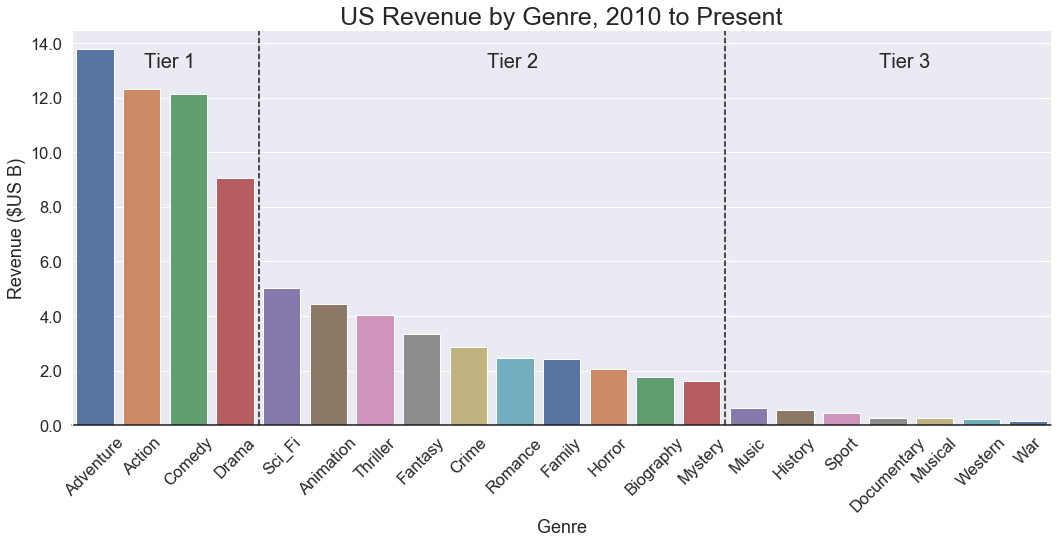

In [291]:
# Set up the matplotlib figure
h = 7
l = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(l, h), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

#Add Data
sns.barplot(x = 'genre_capitalized', y = 'domestic_gross_dltd', data = genre_df[genre_df.domestic_gross_dltd > 0].sort_values(by='domestic_gross_dltd', ascending=False), ax=ax1, palette="deep")

#Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Revenue ($US B)")
ax1.set_xlabel("Genre")
ax1.set_title("US Revenue by Genre, 2010 to Present", fontsize = 25)


#Add vertical lines and text
ax1.axvline(x=(l/3-l*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(l/3*3-l*0.1), color='k', linestyle='--')
ax1.text(0.1,text_height,'Tier 1',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.45,text_height,'Tier 2',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.85,text_height,'Tier 3',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)/10**9)))

#make font larger
sns.set(font_scale=1.5)

#show plot
plt.savefig('charts/revenue_by_genre.png')
plt.show()

### ROI by genre

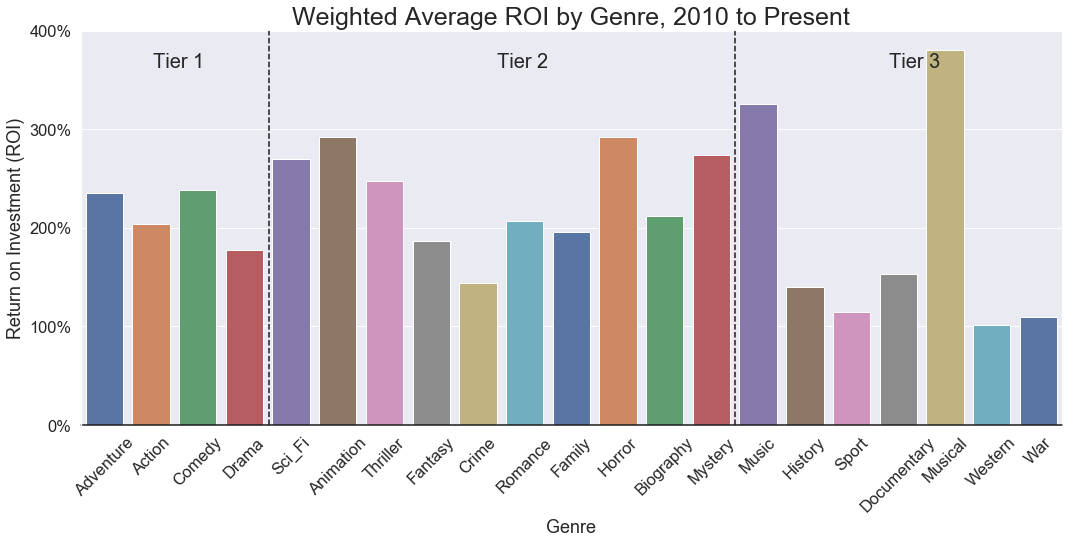

In [292]:
# Set up the matplotlib figure
h = 7
l = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(l, h), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

#Add Data
sns.barplot(x = 'genre_capitalized', y = 'ROI', data = genre_df[genre_df.domestic_gross_dltd > 0].sort_values(by='domestic_gross_dltd', ascending=False), ax=ax1, palette="deep")

#Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Return on Investment (ROI)")
ax1.set_xlabel("Genre")
ax1.set_title("Weighted Average ROI by Genre, 2010 to Present", fontsize = 25)

#Add vertical lines and text
ax1.axvline(x=(l/3-l*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(l/3*3-l*0.1), color='k', linestyle='--')
ax1.text(0.1,text_height,'Tier 1',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.45,text_height,'Tier 2',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.85,text_height,'Tier 3',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
plt.yticks(np.arange(5))
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{number:.{round}%}".format(number=int(x),round=0)))

#make font larger
sns.set(font_scale=1.5)

#show plot
plt.savefig('charts/ROI_by_genre.png')
plt.show()

### Per-movie profit by genre (Mean)

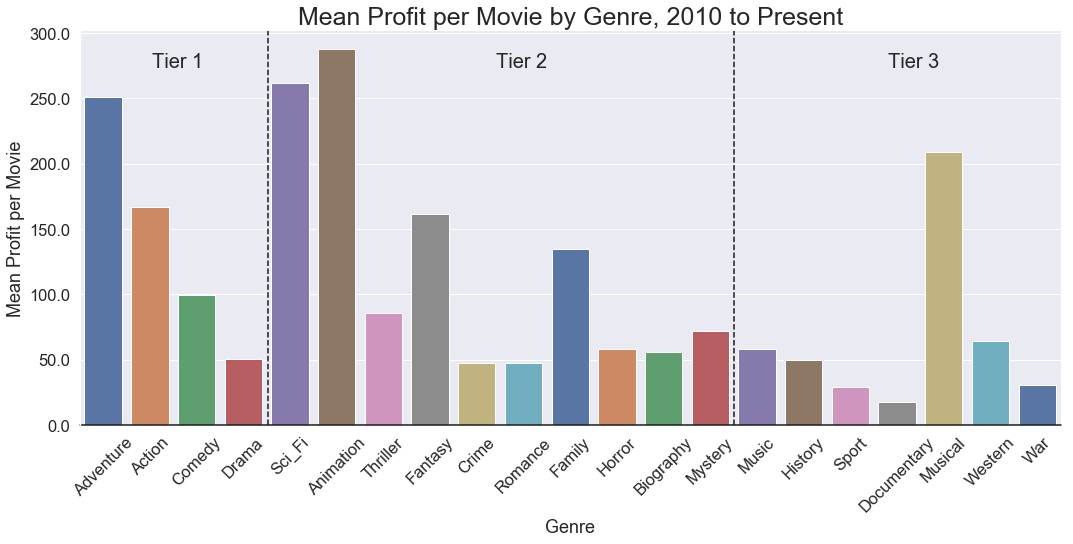

In [304]:
# Set up the matplotlib figure
h = 7
l = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(l, h), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

#Add Data
sns.barplot(x = 'genre_capitalized', y = 'mean_profit_per_movie', data = genre_df[genre_df.domestic_gross_dltd > 0].sort_values(by='domestic_gross_dltd', ascending=False), ax=ax1, palette="deep")

#Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mean Profit per Movie")
ax1.set_xlabel("Genre")
ax1.set_title("Mean Profit per Movie by Genre, 2010 to Present", fontsize = 25)

#Add vertical lines and text
ax1.axvline(x=(l/3-l*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(l/3*3-l*0.1), color='k', linestyle='--')
ax1.text(0.1,text_height,'Tier 1',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.45,text_height,'Tier 2',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.85,text_height,'Tier 3',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
# plt.yticks(np.arange(5))
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{number:,}".format(number=int(x)/10**6)))

#make font larger
sns.set(font_scale=1.5)

#show plot
plt.savefig('charts/mean_profit_per_movie_by_genre.png')
plt.show()

### Per-movie profit by genre (Median)

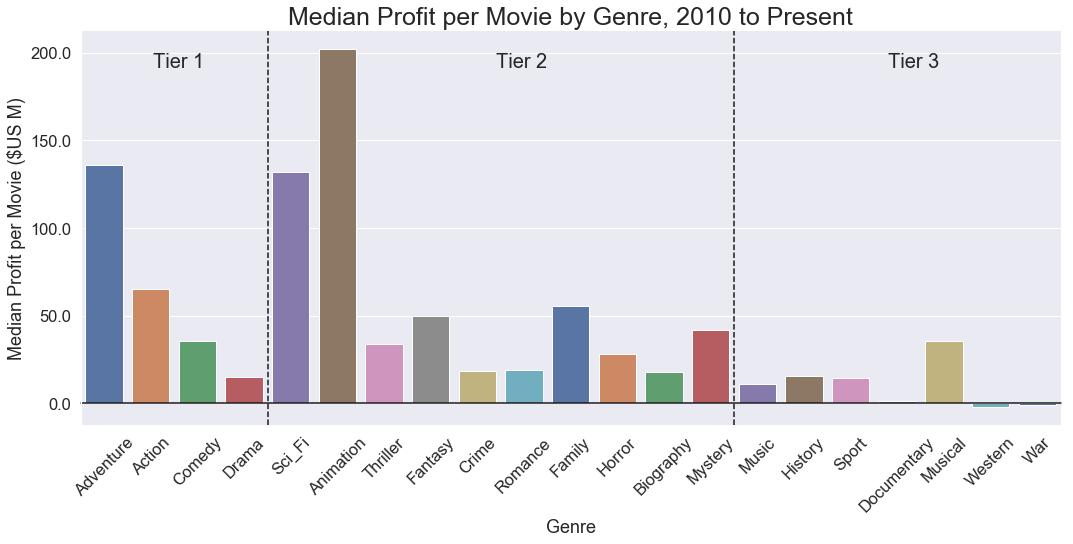

In [305]:
# Set up the matplotlib figure
h = 7
l = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(l, h), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd', data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

#Add Data
sns.barplot(x = 'genre_capitalized', y = 'median_profit_per_movie', data = genre_df[genre_df.domestic_gross_dltd > 0].sort_values(by='domestic_gross_dltd', ascending=False), ax=ax1, palette="deep")

#Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Median Profit per Movie ($US M)")
ax1.set_xlabel("Genre")
ax1.set_title("Median Profit per Movie by Genre, 2010 to Present", fontsize = 25)

#Add vertical lines and text
ax1.axvline(x=(l/3-l*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(l/3*3-l*0.1), color='k', linestyle='--')
ax1.text(0.1,text_height,'Tier 1',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.45,text_height,'Tier 2',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.85,text_height,'Tier 3',fontsize=20,horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
# plt.yticks(np.arange(5))
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{number:,}".format(number=int(x)/10**6)))

#make font larger
sns.set(font_scale=1.5)

#show plot
plt.savefig('charts/median_profit_per_movie_by_genre.png')
plt.show()

### Visualization revenue over time stacked bar

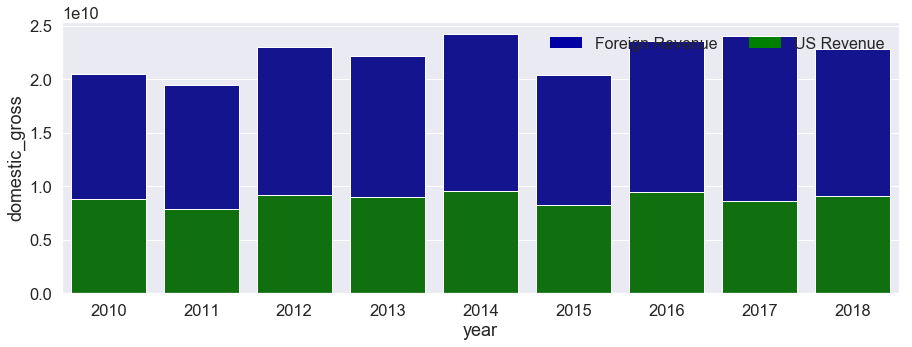

In [278]:
#Set general plot properties
f, ax1 = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

#Plot 1 - background - "total" (top) series
# sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, , color = "red")
sns.barplot(x = 'year', y = 'worldwide_gross', data = year_df[year_df['year'] < 2019], ax=ax1, color='#0000A3')

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = 'year', y = 'domestic_gross', data = year_df[year_df['year'] < 2019], ax=ax1, color="green")
# bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Foreign Revenue', 'US Revenue'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
# sns.despine(left=True)
# bottom_plot.set_ylabel("Y-axis label")
# bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
# for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#     item.set_fontsize(16)
# plt.savefig('charts/revenue_over_time.png')
plt.show()